# EDA - Dataset Original de Kaggle

## Contexte
Ce notebook présente une analyse exploratoire basique du dataset original téléchargé depuis Kaggle avant nettoyage.

## Objectifs
1. Comprendre la taille et la structure du dataset
2. Analyser les caractéristiques de base
3. Identifier les doublons et leur proportion

## Méthodologie
- Analyse descriptive simple (pas de statistiques avancées)
- Focus sur l'identification des problèmes de qualité des données
- Visualisations claires pour communiquer les résultats

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Configuration matplotlib/seaborn
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
%matplotlib inline

# Configuration pandas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Chemins des fichiers
DATA_PATH = Path("../data/Final_Augmented_dataset_Diseases_and_Symptoms.csv")
OUTPUT_DIR = Path("../data/output")

# Paramètres d'analyse
TOP_N_DISEASES = 20  # Nombre de maladies à afficher dans le graphique
THRESHOLD_ZERO_PERCENTAGE = 99  # Seuil pour identifier les colonnes presque vides (%)
MAX_DUPLICATE_EXAMPLES = 10  # Nombre d'exemples de doublons à afficher

# Créer le répertoire de sortie s'il n'existe pas
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print("✓ Constantes définies")
print(f"  - Fichier source: {DATA_PATH}")
print(f"  - Répertoire output: {OUTPUT_DIR}")

✓ Constantes définies
  - Fichier source: ../data/Final_Augmented_dataset_Diseases_and_Symptoms.csv
  - Répertoire output: ../data/output


## Chargement du Dataset

**Objectif:** Charger le dataset original depuis Kaggle et vérifier le chargement

In [2]:
# Charger le dataset original
print(f"Chargement du dataset depuis: {DATA_PATH}")
df = pd.read_csv(DATA_PATH)


print(f"  - Lignes: {df.shape[0]:,}")
print(f"  - Colonnes: {df.shape[1]:,}")

Chargement du dataset depuis: ../data/Final_Augmented_dataset_Diseases_and_Symptoms.csv
  - Lignes: 246,945
  - Colonnes: 378


## Exploration Initiale

In [3]:
df.head(10)

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,irregular heartbeat,breathing fast,hoarse voice,sore throat,difficulty speaking,cough,nasal congestion,throat swelling,diminished hearing,lump in throat,throat feels tight,difficulty in swallowing,skin swelling,retention of urine,groin mass,leg pain,hip pain,suprapubic pain,blood in stool,lack of growth,emotional symptoms,elbow weakness,back weakness,pus in sputum,symptoms of the scrotum and testes,swelling of scrotum,pain in testicles,flatulence,pus draining from ear,jaundice,mass in scrotum,white discharge from eye,irritable infant,abusing alcohol,fainting,hostile behavior,drug abuse,sharp abdominal pain,feeling ill,vomiting,headache,nausea,diarrhea,vaginal itching,vaginal dryness,painful urination,involuntary urination,pain during intercourse,frequent urination,lower abdominal pain,vaginal discharge,blood in urine,hot flashes,intermenstrual bleeding,hand or finger pain,wrist pain,hand or finger swelling,arm pain,wrist swelling,arm stiffness or tightness,arm swelling,hand or finger stiffness or tightness,wrist stiffness or tightness,lip swelling,toothache,abnormal appearing skin,skin lesion,acne or pimples,dry lips,facial pain,mouth ulcer,skin growth,eye deviation,diminished vision,double vision,cross-eyed,symptoms of eye,pain in eye,eye moves abnormally,abnormal movement of eyelid,foreign body sensation in eye,irregular appearing scalp,swollen lymph nodes,back pain,neck pain,low back pain,pain of the anus,pain during pregnancy,pelvic pain,impotence,infant spitting up,vomiting blood,regurgitation,burning abdominal pain,restlessness,symptoms of infants,wheezing,peripheral edema,neck mass,ear pain,jaw swelling,mouth dryness,neck swelling,knee pain,foot or toe pain,bowlegged or knock-kneed,ankle pain,bones are painful,knee weakness,elbow pain,knee swelling,skin moles,knee lump or mass,weight gain,problems with movement,knee stiffness or tightness,leg swelling,foot or toe swelling,heartburn,smoking problems,muscle pain,infant feeding problem,recent weight loss,problems with shape or size of breast,underweight,difficulty eating,scanty menstrual flow,vaginal pain,vaginal redness,vulvar irritation,weakness,decreased heart rate,increased heart rate,bleeding or discharge from nipple,ringing in ear,plugged feeling in ear,itchy ear(s),frontal headache,fluid in ear,neck stiffness or tightness,spots or clouds in vision,eye redness,lacrimation,itchiness of eye,blindness,eye burns or stings,itchy eyelid,feeling cold,decreased appetite,excessive appetite,excessive anger,loss of sensation,focal weakness,slurring words,symptoms of the face,disturbance of memory,paresthesia,side pain,fever,shoulder pain,shoulder stiffness or tightness,shoulder weakness,arm cramps or spasms,shoulder swelling,tongue lesions,leg cramps or spasms,abnormal appearing tongue,ache all over,lower body pain,problems during pregnancy,spotting or bleeding during pregnancy,cramps and spasms,upper abdominal pain,stomach bloating,changes in stool appearance,unusual color or odor to urine,kidney mass,swollen abdomen,symptoms of prostate,leg stiffness or tightness,difficulty breathing,rib pain,joint pain,muscle stiffness or tightness,pallor,hand or finger lump or mass,chills,groin pain,fatigue,abdominal distention,regurgitation.1,symptoms of the kidneys,melena,flushing,coughing up sputum,seizures,delusions or hallucinations,shoulder cramps or spasms,joint stiffness or tightness,pain or soreness of breast,excessive urination at night,bleeding from eye,rectal bleeding,constipation,temper problems,coryza,wrist weakness,eye strain,hemoptysis,lymphedema,skin on leg or foot looks infected,allergic reaction,congestion in chest,muscle swelling,pus in urine,abnormal size or shape of ear,low back weakness,sleepiness,apnea,abnormal breathing sounds,excessive growth,elbow cramps or spasms,feeling h

### 📊 Observations Initiales

- Le dataset contient **plus de 246,000 lignes** - très volumineux
- Il y a **378 colonnes** (1 colonne 'disease' + 377 colonnes de symptômes)
- C'est un dataset binaire : les symptômes sont codés en 0/1

## Analyse des Types de Données

### Informations sur les colonnes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


### Résumé des types de données

In [5]:
df.dtypes.value_counts()

int64     377
object      1
Name: count, dtype: int64

### 📋 Types de Données

- **La majorité des colonnes sont des entiers (int64)** : représentent les symptômes binaires (0/1)
- **Une colonne objet (object)** : la colonne 'disease' contenant les noms des maladies

## Statistiques Descriptives

In [6]:
df.describe()

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,irregular heartbeat,breathing fast,hoarse voice,sore throat,difficulty speaking,cough,nasal congestion,throat swelling,diminished hearing,lump in throat,throat feels tight,difficulty in swallowing,skin swelling,retention of urine,groin mass,leg pain,hip pain,suprapubic pain,blood in stool,lack of growth,emotional symptoms,elbow weakness,back weakness,pus in sputum,symptoms of the scrotum and testes,swelling of scrotum,pain in testicles,flatulence,pus draining from ear,jaundice,mass in scrotum,white discharge from eye,irritable infant,abusing alcohol,fainting,hostile behavior,drug abuse,sharp abdominal pain,feeling ill,vomiting,headache,nausea,diarrhea,vaginal itching,vaginal dryness,painful urination,involuntary urination,pain during intercourse,frequent urination,lower abdominal pain,vaginal discharge,blood in urine,hot flashes,intermenstrual bleeding,hand or finger pain,wrist pain,hand or finger swelling,arm pain,wrist swelling,arm stiffness or tightness,arm swelling,hand or finger stiffness or tightness,wrist stiffness or tightness,lip swelling,toothache,abnormal appearing skin,skin lesion,acne or pimples,dry lips,facial pain,mouth ulcer,skin growth,eye deviation,diminished vision,double vision,cross-eyed,symptoms of eye,pain in eye,eye moves abnormally,abnormal movement of eyelid,foreign body sensation in eye,irregular appearing scalp,swollen lymph nodes,back pain,neck pain,low back pain,pain of the anus,pain during pregnancy,pelvic pain,impotence,infant spitting up,vomiting blood,regurgitation,burning abdominal pain,restlessness,symptoms of infants,wheezing,peripheral edema,neck mass,ear pain,jaw swelling,mouth dryness,neck swelling,knee pain,foot or toe pain,bowlegged or knock-kneed,ankle pain,bones are painful,knee weakness,elbow pain,knee swelling,skin moles,knee lump or mass,weight gain,problems with movement,knee stiffness or tightness,leg swelling,foot or toe swelling,heartburn,smoking problems,muscle pain,infant feeding problem,recent weight loss,problems with shape or size of breast,underweight,difficulty eating,scanty menstrual flow,vaginal pain,vaginal redness,vulvar irritation,weakness,decreased heart rate,increased heart rate,bleeding or discharge from nipple,ringing in ear,plugged feeling in ear,itchy ear(s),frontal headache,fluid in ear,neck stiffness or tightness,spots or clouds in vision,eye redness,lacrimation,itchiness of eye,blindness,eye burns or stings,itchy eyelid,feeling cold,decreased appetite,excessive appetite,excessive anger,loss of sensation,focal weakness,slurring words,symptoms of the face,disturbance of memory,paresthesia,side pain,fever,shoulder pain,shoulder stiffness or tightness,shoulder weakness,arm cramps or spasms,shoulder swelling,tongue lesions,leg cramps or spasms,abnormal appearing tongue,ache all over,lower body pain,problems during pregnancy,spotting or bleeding during pregnancy,cramps and spasms,upper abdominal pain,stomach bloating,changes in stool appearance,unusual color or odor to urine,kidney mass,swollen abdomen,symptoms of prostate,leg stiffness or tightness,difficulty breathing,rib pain,joint pain,muscle stiffness or tightness,pallor,hand or finger lump or mass,chills,groin pain,fatigue,abdominal distention,regurgitation.1,symptoms of the kidneys,melena,flushing,coughing up sputum,seizures,delusions or hallucinations,shoulder cramps or spasms,joint stiffness or tightness,pain or soreness of breast,excessive urination at night,bleeding from eye,rectal bleeding,constipation,temper problems,coryza,wrist weakness,eye strain,hemoptysis,lymphedema,skin on leg or foot looks infected,allergic reaction,congestion in chest,muscle swelling,pus in urine,abnormal size or shape of ear,low back weakness,sleepiness,apnea,abnormal breathing sounds,excessive growth,elbow cramps or spasms,feeling hot and co

## Distribution des Maladies

**Thinking:** Analysons la répartition des maladies pour comprendre si le dataset est équilibré

### Distribution des maladies

In [7]:
# Distribution des maladies
disease_counts = df["diseases"].value_counts()

print(f"Nombre total de maladies uniques: {len(disease_counts)}")
print(f"\nTop {TOP_N_DISEASES} maladies:")
print(disease_counts.head(TOP_N_DISEASES))

# Statistiques sur la distribution
print("\n✓ Statistiques de distribution:")
print(f"  - Maladie la plus fréquente: '{disease_counts.index[0]}' ({disease_counts.iloc[0]:,} occurrences)")
print(f"  - Maladie la moins fréquente: '{disease_counts.index[-1]}' ({disease_counts.iloc[-1]:,} occurrences)")
print(f"  - Moyenne par maladie: {disease_counts.mean():.1f} occurrences")
print(f"  - Médiane: {disease_counts.median():.1f} occurrences")

Nombre total de maladies uniques: 773

Top 20 maladies:
diseases
cystitis                          1219
vulvodynia                        1218
nose disorder                     1218
complex regional pain syndrome    1217
spondylosis                       1216
hypoglycemia                      1215
peripheral nerve disorder         1215
esophagitis                       1215
vaginal cyst                      1215
conjunctivitis due to allergy     1215
diverticulitis                    1214
gastrointestinal hemorrhage       1214
acute bronchitis                  1213
pneumonia                         1212
fungal infection of the hair      1212
infectious gastroenteritis        1212
spontaneous abortion              1212
sprain or strain                  1212
gout                              1211
arthritis of the hip              1210
Name: count, dtype: int64

✓ Statistiques de distribution:
  - Maladie la plus fréquente: 'cystitis' (1,219 occurrences)
  - Maladie la moins fréquente: 'o

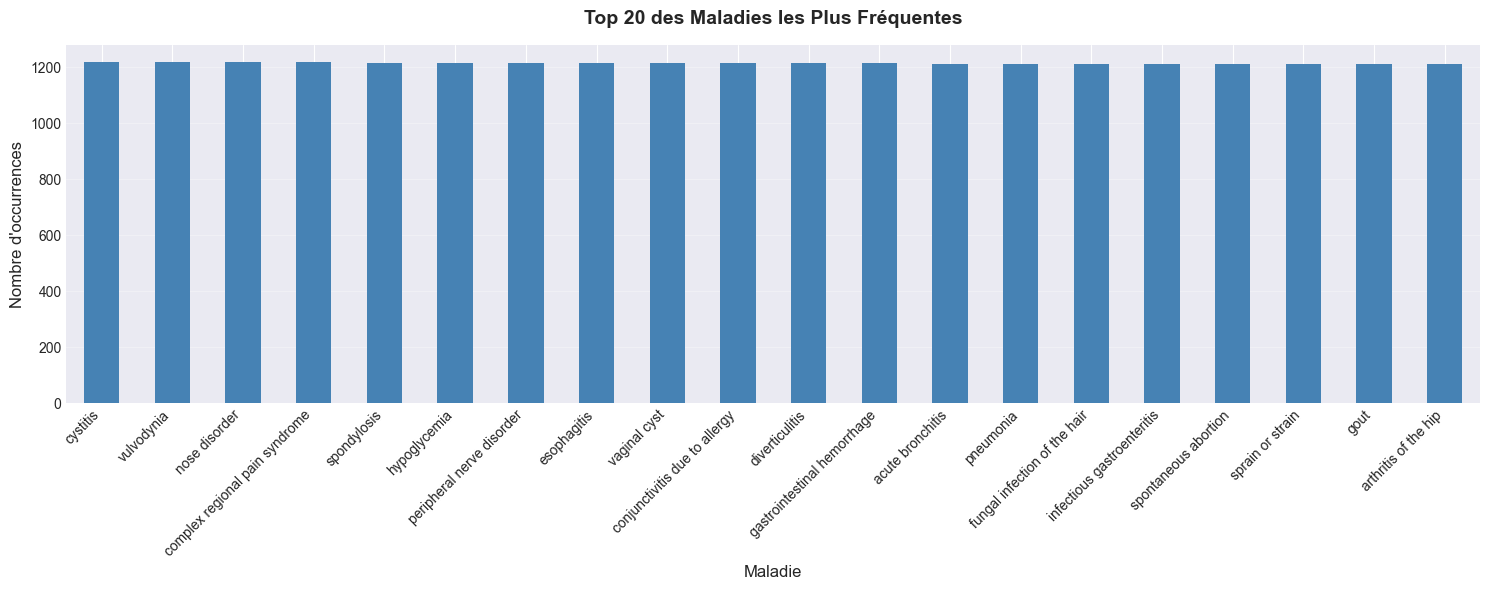

In [8]:
# Visualisation de la distribution
plt.figure(figsize=(15, 6))
disease_counts.head(TOP_N_DISEASES).plot(kind="bar", color="steelblue")
plt.title(
    f"Top {TOP_N_DISEASES} des Maladies les Plus Fréquentes",
    fontsize=14,
    fontweight="bold",
    pad=15,
)
plt.xlabel("Maladie", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

## 🔍 Analyse des Doublons

### Section Critique: Identification des Données en Double

**Thinking:** Les doublons sont un problème majeur qui peut biaiser toute analyse ultérieure. C'est la raison principale de cette EDA.

In [9]:
total_rows = len(df)
print(f"Dataset initial: {total_rows:,} lignes\n")

# Compter les doublons
duplicate_mask = df.duplicated()
duplicate_rows = duplicate_mask.sum()
unique_rows = total_rows - duplicate_rows
duplicate_percentage = (duplicate_rows / total_rows) * 100

print("Résultats de l'analyse:")
print(f"- Total de lignes: {total_rows:,}")
print(f"- Lignes uniques: {unique_rows:,} ({unique_rows / total_rows * 100:.1f}%)")
print(f"- Lignes en doublon: {duplicate_rows:,} ({duplicate_percentage:.2f}%)")

# Sauvegarder les statistiques
duplicate_stats = {
    "total_rows": total_rows,
    "unique_rows": unique_rows,
    "duplicate_rows": duplicate_rows,
    "duplicate_percentage": duplicate_percentage,
}

Dataset initial: 246,945 lignes

Résultats de l'analyse:
- Total de lignes: 246,945
- Lignes uniques: 189,647 (76.8%)
- Lignes en doublon: 57,298 (23.20%)


### Visualisation de la Proportion de Doublons

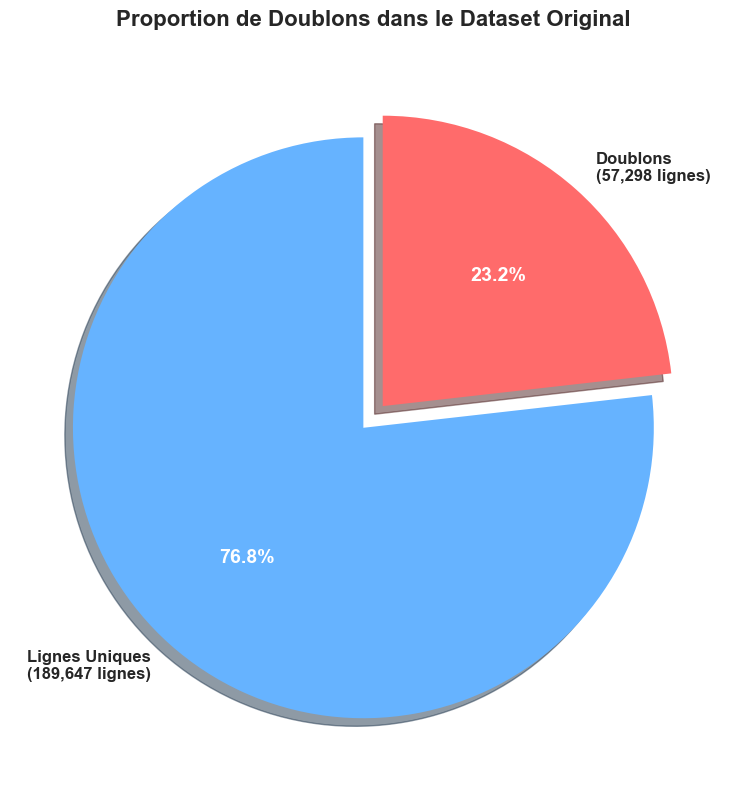

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

sizes = [unique_rows, duplicate_rows]
labels = [
    f"Lignes Uniques\n({unique_rows:,} lignes)",
    f"Doublons\n({duplicate_rows:,} lignes)",
]
colors = ["#66b3ff", "#ff6b6b"]
explode = (0.05, 0.05)  # Légèrement séparer les portions

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    explode=explode,
    shadow=True,
    startangle=90,
    textprops={"fontsize": 12, "fontweight": "bold"},
)

# Améliorer la lisibilité des pourcentages
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(14)
    autotext.set_fontweight("bold")

ax.set_title(
    "Proportion de Doublons dans le Dataset Original",
    fontsize=16,
    fontweight="bold",
    pad=20,
)

plt.tight_layout()
plt.show()

### 📌 Observations sur les Doublons

⚠️ **Point Critique:** Le dataset contient une proportion significative de doublons.

**Pourquoi c'est un problème:**
- **Biais statistique:** Les doublons faussent les statistiques (moyennes, fréquences)
- **Taille artificielle:** La vraie taille du dataset est plus petite

**Action Requise:** Nettoyage obligatoire avant toute analyse ou modélisation

## 🎯 Filtrage par Maladies Cibles

### Stratégie de Nettoyage

**Attention:** Pour ce projet, nous nous concentrons sur 6 maladies spécifiques. Cela nous permettra de :
- Réduire significativement la taille du dataset
- Supprimer les colonnes (symptômes) non pertinentes

**Maladies sélectionnées:** anxiety, cystitis, herniated disk, panic disorder, pneumonia, spondylolisthesis

In [11]:
SELECTED_DISEASES = [
    "anxiety",
    "cystitis",
    "herniated disk",
    "panic disorder",
    "pneumonia",
    "spondylolisthesis",
]

**Rationale du choix:**
- Maladies avec des symptômes suffisamment distincts
- Bonne couverture de différentes catégories médicales
- Volume de données suffisant pour chaque maladie

In [12]:
# Avant cleaning
df[df['diseases'].isin(SELECTED_DISEASES)].groupby('diseases').size().sort_values(ascending=False)

diseases
cystitis             1219
pneumonia            1212
anxiety              1198
panic disorder        909
herniated disk        908
spondylolisthesis     673
dtype: int64

In [13]:
# Bye bye les doublons
df_unique = df.drop_duplicates()

In [14]:
df_filtered = df_unique[df_unique['diseases'].isin(SELECTED_DISEASES)]
# distribution_number_df = diseases_df.groupby('diseases').size().sort_values(ascending=False)
distribution_number_df = df_filtered.value_counts(subset=['diseases'], sort=True)
distribution_number_df

diseases         
cystitis             1219
pneumonia            1212
anxiety              1198
herniated disk        828
panic disorder        810
spondylolisthesis     514
Name: count, dtype: int64

In [15]:
distribution_pct_df = df_filtered.value_counts(subset=['diseases'], normalize=True, sort=True)

In [16]:
distribution_df = (
    distribution_number_df
    .rename("count")
    .to_frame()
    .join(distribution_pct_df.rename("pct"))
)
distribution_df.style.format({
    "count": "{:,}",
    "pct": "{:.2%}"
})

,count,pct
diseases,,
cystitis,"1,219",21.09%
pneumonia,"1,212",20.97%
anxiety,"1,198",20.72%
herniated disk,828,14.32%
panic disorder,810,14.01%
spondylolisthesis,514,8.89%


### Suppression des Colonnes Inutilisées

**Idée:** Après avoir filtré les maladies, certaines colonnes de symptômes ne contiennent plus que des zéros. Ces colonnes sont inutiles et peuvent être supprimées.

In [17]:
removed_cols = df_filtered.columns[(df_filtered == 0).all()]
df_final = df_filtered.drop(columns=removed_cols)
df_final.shape

(5781, 50)

## 📊 Résumé de la Transformation des Données

In [18]:
# Créer un tableau comparatif
summary = {
    "Dataset Original": {
        "Lignes": f"{len(df):,}",
        "Lignes uniques": f"{len(df_unique):,}",
        "Maladies": f"{df['diseases'].nunique()}",
        "Colonnes": f"{df.shape[1]}",
    },
    "Dataset Nettoyé": {
        "Lignes": f"{len(df_final):,}",
        "Lignes uniques": f"{len(df_final):,} (100%)",
        "Maladies": f"{len(SELECTED_DISEASES)}",
        "Colonnes": f"{df_final.shape[1]}",
    },
    "Réduction": {
        "Lignes": f"-{len(df) - len(df_final):,} ({(len(df) - len(df_final)) / len(df) * 100:.1f}%)",
        "Lignes uniques": f"-{len(df_unique) - len(df_final):,}",
        "Maladies": f"-{df['diseases'].nunique() - len(SELECTED_DISEASES)}",
        "Colonnes": f"-{df.shape[1] - df_final.shape[1]}",
    },
}
summary_df = pd.DataFrame(summary)
summary_df

,Dataset Original,Dataset Nettoyé,Réduction
Lignes,"246,945","5,781","-241,164 (97.7%)"
Lignes uniques,"189,647","5,781 (100%)","-183,866"
Maladies,773,6,-767
Colonnes,378,50,-328


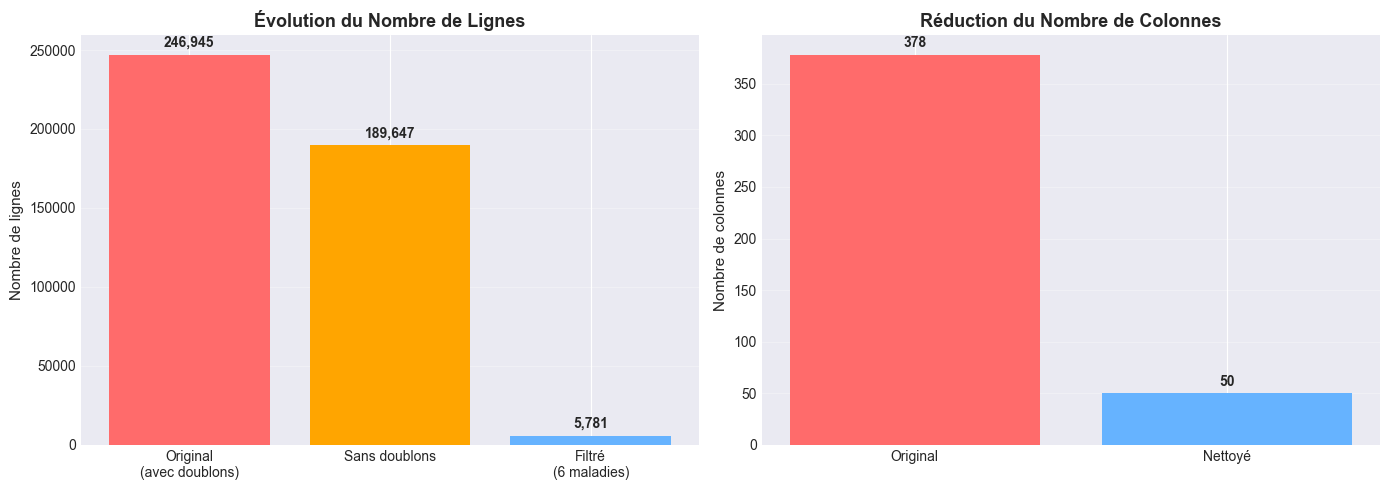

In [19]:
# Visualisation comparative des dimensions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Nombre de lignes
categories = ["Original\n(avec doublons)", "Sans doublons", "Filtré\n(6 maladies)"]
lignes = [len(df), len(df_unique), len(df_final)]

axes[0].bar(categories, lignes, color=["#ff6b6b", "#ffa500", "#66b3ff"])
axes[0].set_ylabel("Nombre de lignes", fontsize=11)
axes[0].set_title("Évolution du Nombre de Lignes", fontsize=13, fontweight="bold")
axes[0].grid(axis="y", alpha=0.3)

# Ajouter les valeurs sur les barres
for i, v in enumerate(lignes):
    axes[0].text(i, v + max(lignes) * 0.02, f"{v:,}", ha="center", fontweight="bold")

# Graphique 2: Nombre de colonnes
categories_cols = ["Original", "Nettoyé"]
colonnes = [df.shape[1], df_final.shape[1]]

axes[1].bar(categories_cols, colonnes, color=["#ff6b6b", "#66b3ff"])
axes[1].set_ylabel("Nombre de colonnes", fontsize=11)
axes[1].set_title("Réduction du Nombre de Colonnes", fontsize=13, fontweight="bold")
axes[1].grid(axis="y", alpha=0.3)

# Ajouter les valeurs sur les barres
for i, v in enumerate(colonnes):
    axes[1].text(i, v + max(colonnes) * 0.02, f"{v}", ha="center", fontweight="bold")

plt.tight_layout()
plt.show()

## Conclusion de l'EDA

### 📈 Résultats de l'Analyse

Cette analyse exploratoire du dataset original de Kaggle a permis d'identifier plusieurs problèmes de qualité des données et de préparer un dataset nettoyé pour l'analyse.

#### 🔍 Problèmes Identifiés

1. **Doublons Massifs**
   - **23.20%** du dataset original était constitué de doublons
   - **57,298 lignes** dupliquées sur 246,945 au total
   - Impact critique sur la qualité des analyses et du ML

2. **Trop de Maladies**
   - **773 maladies** différentes dans le dataset original
   - Beaucoup de maladies avec très peu d'exemples
   - Impossibilité de créer des modèles robustes avec autant de classes

3. **Colonnes Inutiles**
   - Nombreuses colonnes de symptômes non utilisées après filtrage
   - Augmentent la dimensionnalité sans apporter d'information

#### ✅ Actions Réalisées

1. **Suppression des Doublons**
   - Toutes les lignes dupliquées ont été supprimées
   - Dataset réduit à des lignes uniques uniquement

2. **Filtrage par Maladies Cibles**
   - Sélection de **6 maladies** spécifiques pour le projet
   - Maladies choisies : anxiety, cystitis, herniated disk, panic disorder, pneumonia, spondylolisthesis
   - Critères : symptômes distincts, bonne représentation, volume suffisant

3. **Nettoyage des Colonnes**
   - Suppression des colonnes de symptômes non utilisées
   - Réduction significative de la dimensionnalité

### 📊 Dataset Final

**Caractéristiques du dataset nettoyé:**
- **~5,700 lignes** (contre 246,945 originalement)
- **~50 colonnes** (contre 378 originalement)
- **6 maladies** (contre 773 originalement)
- **0% de doublons**
- **100% de données pertinentes**

**Améliorations:**
- ✅ Taille réduite de **97.7%** (lignes)
- ✅ Dimensionnalité réduite de **86.8%** (colonnes)
- ✅ Qualité améliorée (pas de doublons)
- ✅ Focus sur les maladies d'intérêt
- ✅ Prêt pour l'analyse et le ML

### 🎯 Prochaines Étapes

1. **Analyse Approfondie**
   - EDA détaillée sur le dataset nettoyé
   - Analyse des corrélations entre symptômes et maladies
   - Identification des patterns discriminants

2. **Préparation ML**
   - Feature engineering si nécessaire
   - Séparation train/validation/test
   - Normalisation/standardisation

3. **Modélisation**
   - Entraînement de modèles de classification
   - Évaluation des performances
   - Optimisation des hyperparamètres

### 💾 Sauvegarde du Dataset Nettoyé

Le dataset nettoyé sera sauvegardé dans `data/output/cleaned.csv` pour les analyses futures.

In [20]:
# Sauvegarder le dataset final nettoyé
output_file = OUTPUT_DIR / "filtered-diseases.csv"
df_final.to_csv(output_file, index=False)